# Prepare Data for Hydrus-1D

In [167]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from scipy import stats

In [168]:
Evap_data = pd.read_csv('..\AGRON 935\Evaporation.csv', sep = '\t')
glob.os.listdir()

['.git',
 '.ipynb_checkpoints',
 'First Draft Project Proposal.ipynb',
 'Flow diagram1.png',
 'Flow diagram2.png',
 'Flow diagram3.png',
 'Phase I.ipynb',
 'README.md',
 'Sample Design_for project.ipynb',
 'Second Draft Project Proposal.ipynb',
 'TRIM.png',
 'Untitled-Copy1.ipynb',
 'Untitled.ipynb']

In [169]:
df = pd.DataFrame(Evap_data)
df = df.drop(columns=['Step','Unnamed: 5','Mass (g)','Uair (kPa)','Notes'])
df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
df['Mass'] = df['Unnamed: 3']
df.head(10)

,Date,Unnamed: 1,Time,Unnamed: 3,Mass
22,5/22/2019,6:08:09 PM,Before Test,0.00,0.00
23,5/22/2019,6:08:19 PM,Before Test,0.00,0.00
24,5/22/2019,6:08:30 PM,Before Test,0.00,0.00
25,5/22/2019,6:08:40 PM,Before Test,0.00,0.00
26,5/22/2019,7:48:40 PM,Before Test,-0.04,-0.04
27,5/22/2019,9:28:40 PM,Before Test,-0.06,-0.06
28,5/22/2019,11:08:40 PM,Before Test,-0.08,-0.08
29,5/23/2019,12:48:40 AM,Before Test,-0.09,-0.09
30,5/23/2019,2:28:40 AM,Before Test,-0.10,-0.10
31,5/23/2019,4:08:40 AM,Before Test,-0.11,-0.11


In [251]:
df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Unnamed: 1'])
df['Delta_time']= df.Datetime-df.Datetime[22]
df['Delta_sec']= df['Delta_time'].dt.days * 86400 + df['Delta_time'].dt.seconds
df

,Date,Unnamed: 1,Time,Unnamed: 3,Mass,Datetime,Delta_time,Delta_sec,Mass_predict
22,5/22/2019,6:08:09 PM,Before Test,0.00,0.00,2019-05-22 18:08:09,0 days 00:00:00,0,-0.079253
23,5/22/2019,6:08:19 PM,Before Test,0.00,0.00,2019-05-22 18:08:19,0 days 00:00:10,10,-0.079242
24,5/22/2019,6:08:30 PM,Before Test,0.00,0.00,2019-05-22 18:08:30,0 days 00:00:21,21,-0.079230
25,5/22/2019,6:08:40 PM,Before Test,0.00,0.00,2019-05-22 18:08:40,0 days 00:00:31,31,-0.079220
26,5/22/2019,7:48:40 PM,Before Test,-0.04,-0.04,2019-05-22 19:48:40,0 days 01:40:31,6031,-0.072784
...,...,...,...,...,...,...,...,...,...
103,5/28/2019,4:08:47 AM,Before Test,-0.41,-0.41,2019-05-28 04:08:47,5 days 10:00:38,468038,0.422762
104,5/28/2019,5:48:47 AM,Before Test,-0.41,-0.41,2019-05-28 05:48:47,5 days 11:40:38,474038,0.429197
105,5/28/2019,7:28:48 AM,Before Test,-0.42,-0.42,2019-05-28 07:28:48,5 days 13:20:39,480039,0.435634
106,5/28/2019,9:08:48 AM,Before Test,-0.42,-0.42,2019-05-28 09:08:48,5 days 15:00:39,486039,0.442070


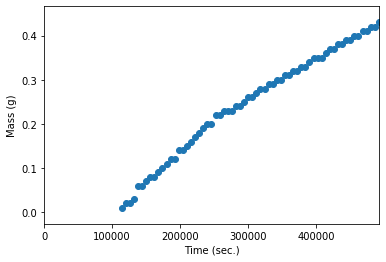

In [173]:
#plt.scatter(df.Delta_time.values, np.absolute(df.Mass))
plt.scatter(df.Delta_sec[22:len(df.Delta_sec)]-df.Delta_sec[22], np.absolute(df.Mass)[22:len(df.Mass)])
plt.ylabel('Mass (g)')
plt.xlabel('Time (sec.)')
plt.xlim(df.Delta_sec[22], df['Delta_sec'].max())
plt.show()

In [283]:
fit_info = stats.linregress(df.Delta_sec[22:len(df.Delta_time)], np.absolute(df.Mass[22:len(df.Mass)]))
Evap_rate = fit_info.slope*86400

R_2 = 'R2 = ' + str(round((fit_info.rvalue**2),2))
Evap = 'Evaporation rate = ' + str(round(Evap_rate, 4)) + ' gr./day'

print(R_2)
print(Evap)

R2 = 0.98
Evaporation rate = 0.0927 gr./day


In [290]:
#y = m*x + b
df['Mass_predict'] = fit_info.intercept + fit_info.slope * df.Delta_sec

,Date,Unnamed: 1,Time,Unnamed: 3,Mass,Datetime,Delta_time,Delta_sec,Mass_predict
22,5/22/2019,6:08:09 PM,Before Test,0.00,0.00,2019-05-22 18:08:09,0 days 00:00:00,0,-0.079253
23,5/22/2019,6:08:19 PM,Before Test,0.00,0.00,2019-05-22 18:08:19,0 days 00:00:10,10,-0.079242
24,5/22/2019,6:08:30 PM,Before Test,0.00,0.00,2019-05-22 18:08:30,0 days 00:00:21,21,-0.079230
25,5/22/2019,6:08:40 PM,Before Test,0.00,0.00,2019-05-22 18:08:40,0 days 00:00:31,31,-0.079220
26,5/22/2019,7:48:40 PM,Before Test,-0.04,-0.04,2019-05-22 19:48:40,0 days 01:40:31,6031,-0.072784
...,...,...,...,...,...,...,...,...,...
103,5/28/2019,4:08:47 AM,Before Test,-0.41,-0.41,2019-05-28 04:08:47,5 days 10:00:38,468038,0.422762
104,5/28/2019,5:48:47 AM,Before Test,-0.41,-0.41,2019-05-28 05:48:47,5 days 11:40:38,474038,0.429197
105,5/28/2019,7:28:48 AM,Before Test,-0.42,-0.42,2019-05-28 07:28:48,5 days 13:20:39,480039,0.435634
106,5/28/2019,9:08:48 AM,Before Test,-0.42,-0.42,2019-05-28 09:08:48,5 days 15:00:39,486039,0.442070


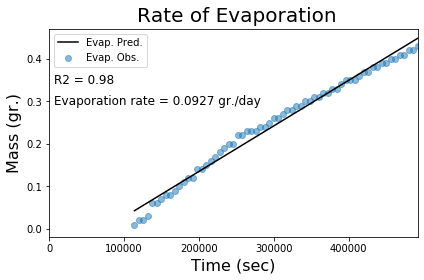

In [291]:
plt.plot(df.Delta_sec[22:len(df.Delta_sec)], np.absolute(df.Mass_predict)[22:len(df.Mass)], color = 'k', label='Evap. Pred.')
#plt.plot(df.Delta_sec, (df.Mass_predict), color = 'k')
plt.scatter(df.Delta_sec[22:len(df.Delta_sec)], np.absolute(df.Mass[22:len(df.Mass)]), alpha = 0.5, label='Evap. Obs.')
#plt.scatter(df.Delta_sec, np.absolute(df.Mass), alpha = 0.5, label='Evap. Obs.')
plt.ylabel('Mass (gr.)', fontsize = 16)
plt.xlabel('Time (sec)', fontsize = 16)
plt.xlim(df.Delta_sec[22], df['Delta_sec'].max())
plt.text(250000, .5, 'Rate of Evaporation', fontsize = 20, horizontalalignment ='center', verticalalignment ='center')
plt.text(7000, .30, Evap , fontsize = 12, horizontalalignment ='left', verticalalignment ='center')
plt.text(7000, .35, R_2 , fontsize = 12, horizontalalignment ='left', verticalalignment ='center')
plt.legend()
plt.tight_layout()
plt.show()